# Covid-19 analysis in India

I asked few people if they have chance to know something about covid-19 what will the questions in there mind. After hearing few I found that most common question is that they wanted to know active cases state wise and is cases increasing or decreasing.

I have provided two plots. 1st one is interactive one where we can see no of active cases, recoveries and death state wise.

Another one is simple but information rich trend. Which tells a story that covid-19 cases in India was stable till May-2020 due to lockdown but after that it increased exponentially, but nothing to worry as we can see recoveries are also good and there are only few death as compared to active cases.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import plotly.express as px

In [2]:
#This module will show graph in new Tab. This will help to reduce load in jupyter notebook
import plotly.io as pio
pio.renderers.default = "browser"

## Data collection
Datas are collected from following link:- 
       
Covid-19 csv file: https://api.covid19india.org/documentation/csv/

Geojson file: https://un-mapped.carto.com/tables/states_india/public/map    

### Read data

In [3]:
df_time = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')
df_data = pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')

#To open json file in python
import json
india_states = json.load(open('states_india.geojson','r'))

## Data Preparation

#### Choropleth

In [4]:
#Group data by state and take only required column
df_state = df_data.groupby('State').sum()
df_state = df_state[['Confirmed','Active','Recovered','Deceased']]

#Dic to match state name with geojson file
rename = {'Delhi':'NCT of Delhi',
         'Andaman and Nicobar Islands':'Andaman & Nicobar Island',
         'Arunachal Pradesh':'Arunanchal Pradesh',
         'Dadra and Nagar Haveli and Daman and Diu':'Dadara & Nagar Havelli',
         'Jammu and Kashmir': 'Jammu & Kashmir'
         }

#Renameing state name
df_state = df_state.rename(index=rename)

#Creating a common feature i.e id in geojson file and csv file
state_id_map = {}
for feature in india_states['features']:
    feature['id'] = feature['properties']['state_code']
    state_id_map[feature['properties']['st_nm']] = feature['id']
    
df_state['id'] = df_state.index.map(state_id_map)

#droping NaN column and resting index
df_state.dropna(inplace=True)
df_state.reset_index(inplace=True)

## Plotting

#### Choropleth

In [5]:
fig = px.choropleth(df_state,
                    locations='id',
                    geojson=india_states,
                    color='Confirmed',
                   hover_name='State',
                   hover_data=['Active','Recovered','Deceased'],
                   title='Covid-19 cases in India')

#To show only India
fig.update_geos(fitbounds='locations',visible=False)
fig.show()

#### Time-Series

<IPython.core.display.Javascript object>


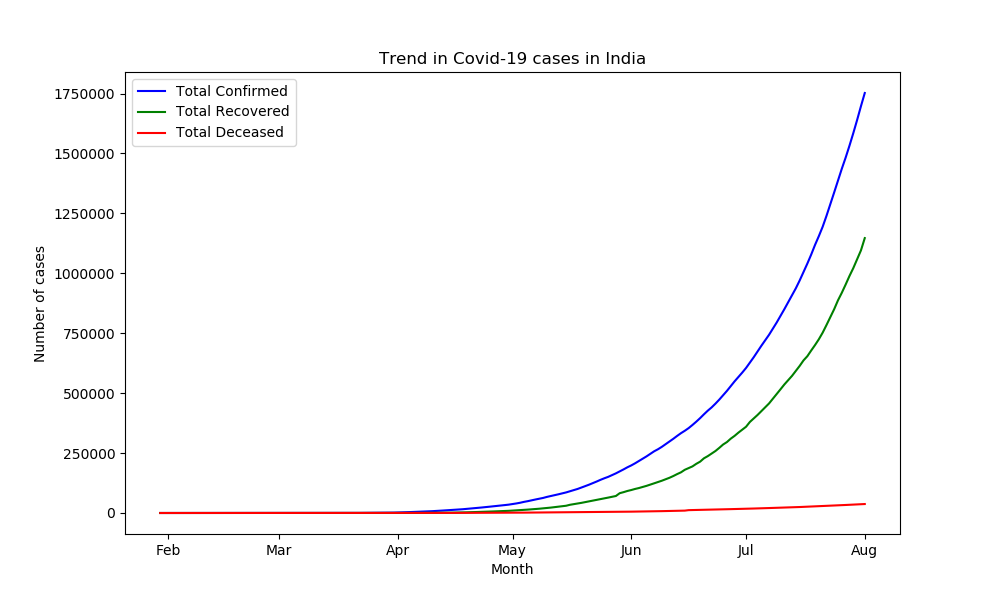

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df_time.index,y=df_time['Total Confirmed'],label='Total Confirmed',color='blue')
sns.lineplot(x=df_time.index,y=df_time['Total Recovered'],label='Total Recovered',color='green')
sns.lineplot(x=df_time.index,y=df_time['Total Deceased'],label='Total Deceased',color='red')
plt.xlabel('Month')
plt.ylabel('Number of cases')
plt.title('Trend in Covid-19 cases in India')
plt.gca().set_xticks([2,31,62,92,123,153,184])
plt.gca().set_xticklabels(['Feb','Mar','Apr','May','Jun','Jul','Aug'])
plt.show()